# Project 2020 - Fundamentals of Data Analysis
Due: last commit on or before January 8th, 2021

Instructions

In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

## IT IS IMPOSSIBLE TO MAKE ACCURATE PREDICTIONS BETWEEN TWO DATASETS WHEN CORELLATION OF THE DATASETS IS WEAK

For this assignment we were provided with two datasets, one representing wind speed, the other representing power produced.

Are the two datasets related? Does the wind speed dataset really have anything to do with the power dataset?

Perhaps there was a hidden factor like a secret army of smurfs running on hamster wheels creating the power output?

However if we find that there is a strong corellation between the dataset of wind speed and the dataset of power produced, we can rule out the theory of 'a secret army of smurfs running on hamster wheels creating the power output' and agree that we can use the corellation between wind speed and power, to predict what the power will be for any given wind speed.

So to prove a correlation between the two datasets I have used the following tests

**Spearman rank test correlation coefficient: 0.819<br>
Kendall correlation test coefficient: 0.728<br>
as well as a linear relationship corellation test: 0.8537775037188597**

I actually found after completing much of the work on this project, the initial raw data had a higher correlation fit with

**Polynomial regression: 0.8796883953739737**<br>

There have also been many studies of Logistic regression relationship between wind speed and power production.

Although there was a strong enough corellation between the two datasets to rule out wild theories such as an army of smurfs creating the power. Why the wild theory of the smurfs? Well most blogs I have read about wind speed to power production says that power production occurs at 7 - 9 mph, the provided dataset says wind power at this dataset starts at 0.325. Maybe we are not really analysing wind speed data, perhaps we are doing analysis for some other nefarious or unknown purpose?

**My conclusion about the datasets provided**<br>
There are still weak and unexplained areas in deficiencies of the corellation test results, which lead me to believe that missing datasets are needed and ultimately a multiple regression formula is needed for better prediction accuracy.

If you were to do multiple regression on predicting wind speed to power production, it is possible you may be able to factor in things like the amount of time the turbine was turned on, score the direction of the wind, score the energy conversion of the type of generator used (is it the same generator being used consistently on all days, or is there a more efficient one being used on other days?).

Below I give an explanation of my best attempt to accurately predict power from wind speed with the limited information that I have been provided.

![corellation.png](corellation.png)

## HOW THE POWERPRODUCTION.CSV DATA LOOKS

In [1]:
import pandas as pd
powerproduction = pd.read_csv('powerproduction.csv')
print(powerproduction.head(10))#show first ten rows of the data

   speed  power
0  0.000  0.000
1  0.125  0.000
2  0.150  0.000
3  0.225  0.000
4  0.275  0.000
5  0.325  4.331
6  0.400  5.186
7  0.450  3.826
8  0.501  1.048
9  0.526  5.553


In [2]:
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')

print(powerproduction.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


## PERFORMING SIMPLE VISUALISATION OF THE DATA

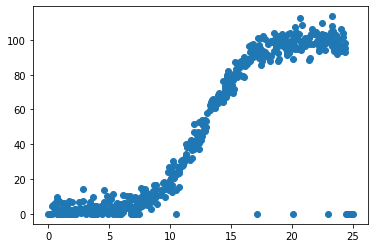

In [3]:
# https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/
# https://www.w3schools.com/python/python_ml_linear_regression.asp

# generate related variables
#https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column
#Pandas DataFrame columns are Pandas Series when you pull them out, which you can then call x.tolist() on 
#to turn them into a Python list. Alternatively you cast it with list(x).

from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
powerproduction = pd.read_csv('powerproduction.csv')
# prepare data
data1 = powerproduction['speed'].tolist()
data2 = powerproduction['power'].tolist()
# plot
plt.scatter(data1, data2)
plt.show()

## PERFORMING SIMPLE LINEAR VISUALISATION OF THE DATA

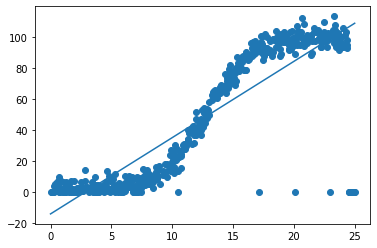

In [4]:
# https://www.w3schools.com/python/python_ml_linear_regression.asp
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

powerproduction = pd.read_csv('powerproduction.csv')

x = powerproduction['speed'].tolist()
y = powerproduction['power'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

#  R for Relationship

> It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.
https://www.w3schools.com/python/python_ml_linear_regression.asp

Using the formula below to show R we can show the strength of the linear relationship: 0.8537775037188597<br>
In later studies I found it's percentage very similar to the data's Spearmans correlation coefficient: 0.819<br>
however the data's Kendall correlation coefficient was only: 0.728

In [5]:
# https://www.w3schools.com/python/python_ml_linear_regression.asp
from scipy import stats
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')

x = powerproduction['speed'].tolist()
y = powerproduction['power'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)


0.8537775037188597


# Simple Linear Regression

**Simple linear regression is used to estimate the relationship between two quantitative variables.**
https://www.scribbr.com/statistics/simple-linear-regression/


Simple Linear Regression, for instance can be used to mearsure the relation of height / weight, as one variable such as weight increases, there is often a relationship where the other variable such as height increases. There is the normal Simple Linear Regression illustrating the growth of infant,child,teenager,adult gaining in height and weight, then there will be exceptions outside of the linear line for gigantism and obesity. People generally don't exceed 7ft in height, the linear graph will plateau at 7ft + in height.

>Some other examples of statistical relationships might include:<br>
Alcohol consumed and blood alcohol content — as alcohol consumption increases, you'd expect one's blood alcohol content to increase, but not perfectly.<br>
Vital lung capacity and pack-years of smoking — as amount of smoking increases (as quantified by the number of pack-years of smoking), you'd expect lung function (as quantified by vital lung capacity) to decrease, but not perfectly.<br>
Driving speed and gas mileage — as driving speed increases, you'd expect gas mileage to decrease, but not perfectly.<br>
Okay, so let's study statistical relationships between one response variable y and one predictor variable x!
https://online.stat.psu.edu/stat462/node/91/

In our case we will be using Simple linear regression to show the relationship between **Wind Speed** and **power** produced by a wind turbine.

The graph from the code below, provides a very effective illustration of power generated from wind.

As wind speed increases, power produced increases, until wind speeds exceed 24 mph and the turbine owner has to turn off the turbine. If there is zero wind speed or very low wind speeds, the graph shows us that there is not sufficient speed to generate power.

On our graph below we have dotted exceptions for windy days with no power, and there can be disparities for power surges where an exceptionally high amount of power was produced compared to days with similar wind.

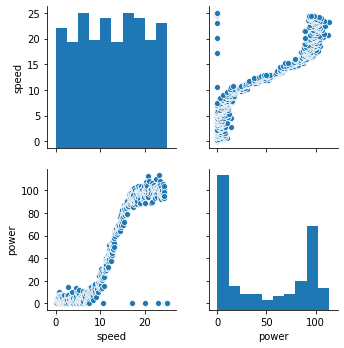

In [6]:
import seaborn as sns
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')
sns.pairplot(powerproduction)



## Assumptions of simple linear regression

I do want to bring the reader's attention to this blog about the assumptions of simple linear regression.

>Simple linear regression is a parametric test, meaning that it makes certain assumptions about the data. These assumptions are:

>Homogeneity of variance (homoscedasticity): the size of the error in our prediction doesn’t change significantly across the values of the independent variable.<br>
>Independence of observations: the observations in the dataset were collected using statistically valid sampling methods, and there are no hidden relationships among observations.<br>
>Normality: The data follows a normal distribution.<br>
>Linear regression makes one additional assumption:<br>

>The relationship between the independent and dependent variable is linear: the line of best fit through the data points is a straight line (rather than a curve or some sort of grouping factor).<br>
If your data do not meet the assumptions of homoscedasticity or normality, you may be able to use a nonparametric test instead, such as the Spearman rank test.

https://www.scribbr.com/statistics/simple-linear-regression/

If you observe the graph above,it is true that the relationship between the independent variable (wind) and the dependent variable (power) is linear.

However using machine learning simple linear regression I found that sizeable errors were made in predicting the independent variable of power from the wind provided in the dataset.

I don't know if the the dataset were collected using statistically valid sampling methods, blogs which I read about energy production from wind seemed to indicate that usually 7mph -9mph winds are needed to generate energy (http://science.unctv.org/content/how-much-wind-does-wind-turbine-need). The wind turbine readings we were supplied with, energy was produced at far lower speeds of 0.325. Are we really looking at data from an industrial wind turbine, or are we doing analysis on some other dataset that appears to fit the linear model.

I also noticed that even between speeds which were quite close together there could be quite large variance in the power produced. That is why the graph shows a very wide linear line centimers thick or so in parts rather than milimeters thick. What is responsible for this? Are there relationships hidden from the observations?

**Why two days with similar windspeeds can be so different**
1. Just because wind is travelling at a certain speed on a certain day, the aerodynamics might not be such that the wind catches the turbine in the same way as another day with the same wind speed, 
2. Alternatively two days with same wind speed but different power productions could be explained by the fact that the turbine could have been turned off for part of the day. 
3. Two days with the same wind speed, where one day produces significantly more energy than the previous day with the same wind speed could be explained to the fact that the owner of the turbine could have been testing and using a better energy generation system which can output more power from lower wind speed. 

It is my view that all of the above hidden relationships could have been going on, and this makes it very hard for a simle linear machine learning algorithm or a polynomial algorithm to correctly predict energy from wind speed. 

### IS MULTIPLE REGRESSION THE SOLUTION?
For this academic exercise of predicting power energy from wind speed we were only able to use the powerproduction.csv file there is however a potential solution that I found on w3schools called multiple regression, which is 'like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.' https://www.w3schools.com/python/python_ml_multiple_regression.asp

If you were to do multiple regression on predicting wind speed to power production, it is possible you may be able to factor in things like the amount of time the turbine was turned on, score the direction of the wind, score the energy conversion of the type of generator used (is it the same generator being used consistently on all days, or is there a more efficient one being used on other days?).

## WHAT HAPPENS WHEN YOU USE A SIMPLE LINEAR REGRESSION ON THE RAW DATASET

You will see from results below when we try and run a simple linear regression algorithm on the raw dataset without any edits to the algorithm or cleansing of the dataset we get nonsense prediction results.

In [7]:
import sklearn.linear_model as lin
import pandas as pd

# Load a dataset.
powerproduction = pd.read_csv('powerproduction.csv')

def f(speed, p):
    return p[0] + speed * p[1]

def predict_power_output(speed):
    return f(speed, p)

speed = powerproduction["speed"].to_numpy()
y = powerproduction["power"].to_numpy()

speed = speed.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(speed, y)
r = model.score(speed, y)
p = [model.intercept_, model.coef_[0]]

predict_power_output(int(20))

print('DEMOSTRATION OF WHY SIMPLE LINEAR REGRESSION PREDICTION WITH OUR UNCLEANSED DATA DOES NOT MAKE SENSE')

print('\nPredicted Energy Output for 0.325 mph winds')
print(predict_power_output(0.325))
print('compare with real data that says 4.331')

print('\nPredicted Energy Output for 2mph winds')
print(predict_power_output(2))

print('\nPredicted Energy Output for 24.399 mph winds')
print(predict_power_output(24.399))
print('compare with real data that says 95.117')

print('\nPredicted Energy Output for 60 mph winds')
print(predict_power_output(60))
print("we know from the real data that speeds over 25 mph don't produce power")

DEMOSTRATION OF WHY SIMPLE LINEAR REGRESSION PREDICTION WITH OUR UNCLEANSED DATA DOES NOT MAKE SENSE

Predicted Energy Output for 0.325 mph winds
-12.301684039263115
compare with real data that says 4.331

Predicted Energy Output for 2mph winds
-4.064711299710295

Predicted Energy Output for 24.399 mph winds
106.0845140096889
compare with real data that says 95.117

Predicted Energy Output for 60 mph winds
281.1558372937605
we know from the real data that speeds over 25 mph don't produce power


One of the main factors causing distortion in predictions was power surges in upper wind speeds, and with these distortions it was possible to enter windspeeds such as 2mph and get a negative energy prediction.

Factors such as a less than perfect Spearmans correlation coefficient: 0.819, and an even lower Kendall correlation coefficient 0.728, means in my view that there is a **19% - 28% unreliability in the correlation of the data provided** when doing analysis on the dataset as a whole. You can potentially improve the correlation score and the linear relationship by doing predictions on smaller packets of data.

The only work around I found was to do linear prediction in smaller segments rather than as a whole.

![LinearAlgorithm.png](LinearAlgorithm.png)

## MY SOLUTION

**Also used for my Machine Learning Project on Github**

>https://github.com/g00387822/Machine_Learning_Project/blob/main/powerproduction.ipynb

>Here is a summary of my model and it's accuracy. I managed to achieve a model with what I consider a reasonable degree of accuracy using some adjustments to simple linear regression.

>Looking at the raw data it is noted that wind speeds 0.275 and below generate no power, wind speeds 24.499 generate no power. There are industry reasons for this. So if a user types a wind speed within those ranges, I will dismiss it and handle their query with an if statement that will return the value of zero.

>Looking at the raw data it is noted that there are are days of wind between the above speeds and no power produced. In my final model days that produce zero power are stripped out. There are industry reasons such as wind turbines being shut for maintenance or not enough demand from the grid. In my modeling I am not interested in including zero power production on windy days.

>Even with or without filtering out zero power days, I found it impossible to make reasonable predictions from simple linear regression on the whole dataset alone, for instance inputting 0.325 or 2mph would always generate negative values, and values input for prediction on higher wind speeds such as 24.399, the prediction would exceed wind speeds found in real data.

>Basically within the data are days where there are power production surges, and these surges negatively impact the predictions, the further way a number is for forecasting. For example power surges in the wind speed ranges 20 - 25 mph can distort the average size of the dataset when trying to predict wind speeds for speeds such as 2mph, likewise power production values in lower wind speeds can distort making predictions for higher wind speeds.

>The best linear prediction happens when you narrow the range of data being used for linear regression analysis.

>My solution can be summarised as follows

>I filtered out the zero power production days

>If a user types wind speeds equal or lower than 0.275 or higher than or equal to 24.499, it will be handled with an if statement and return 0

>All other speeds, linear regression will look at the following bands of data

>0 - 5 mph , '> 5 - 10 mph '> 10 - 15 mph '>15 - 20 mph '>20 - 25 mph

>So if a user inputs a wind speed between 0 - 5 mph, it will get a linear prediction from wind speed data betwween 0 and 5 mph.

>So if a user inputs a wind speed between 5 - 10 mph, it will get a linear prediction from wind speed data betwween 5 and 10 mph.

>So if a user inputs a wind speed between 10 - 15 mph, it will get a linear prediction from wind speed data betwween 10 and 15 mph.

>So if a user inputs a wind speed between 15 - 20 mph, it will get a linear prediction from wind speed data betwween 15 and 20 mph.

>So if a user inputs a wind speed between 20 - 25 mph, it will get a linear prediction from wind speed data betwween 20 and 25 mph.

>I put my final code immediately below.

**Although the above was my final solution for accurately predicting power production from wind speed, it was only for purposes of academic illustration that I built in linear predictions on data used in 5mph increments, e.g. 0-5,5-10,10-15,15-20,20-25, in reality for industrial level prediction the increments should have been done on much smaller ranges and with a larger dataset**


In [8]:
import sklearn.linear_model as lin
import pandas as pd

def do_linear_regression(data,text):

    # Load a dataset.
    text = text
    powerproduction = data
    def f(speed, p):
        return p[0] + speed * p[1]

    def predict_power_output(speed):
        return round(f(speed, p),2)

    speed = powerproduction["speed"].to_numpy()
    y = powerproduction["power"].to_numpy()

    speed = speed.reshape(-1, 1)

    model = lin.LinearRegression()
    model.fit(speed, y)
    r = model.score(speed, y)
    p = [model.intercept_, model.coef_[0]]

    return(predict_power_output(float(text)))

# Load a dataset.
df = pd.read_csv('powerproduction.csv')

# We are removing the non zero values
cleansed_data_2 = df.loc[df['power'] > 0 ]

# filtering between values see https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates



# If a user types wind speeds lower than 0.275 or equal higher than 24.499, it will be handled with an if statement and return 0

def receive_text_from_form(text):
    text = text
    if text <= 0.275:
        return 0

    if text >= 24.499:
        return 0


    #if a user inputs a wind speed between 0 - 5 mph, they will get a linear prediction from wind speed data betwween 0 and 5 mph.

    if text > 0 and text <= 5:
        zero_to_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 0) & (cleansed_data_2['speed']<= 5)]
        print("Calculating doing linear regression on data gathered on wind speeds between >0 <=5")
        return do_linear_regression(zero_to_five,text)


    #if a user inputs a wind speed between 5 - 10 mph, they will get a linear prediction from wind speed data betwween 5 and 10 mph.

    if text > 5 and text <= 10:
        greater_than_five_to_ten = cleansed_data_2.loc[(cleansed_data_2['speed'] > 5) & (cleansed_data_2['speed']<= 10)]
        print("Calculating doing linear regression on data gathered on wind speeds between >5 <=10")
        return do_linear_regression(greater_than_five_to_ten,text)


    #if a user inputs a wind speed between 10 - 15 mph, they will get a linear prediction from wind speed data betwween 10 and 15 mph.
        
    if text > 10 and text <= 15:
        greater_than_ten_to_fifteen = cleansed_data_2.loc[(cleansed_data_2['speed'] > 10) & (cleansed_data_2['speed']<= 15)]
        print("Calculating doing linear regression on data gathered on wind speeds between >10 <=15")
        return do_linear_regression(greater_than_ten_to_fifteen,text)

    #if a user inputs a wind speed between 15 - 20 mph, they will get a linear prediction from wind speed data betwween 15 and 20 mph.

    if text > 15 and text <= 20:
        greater_than_fifteen_to_twenty = cleansed_data_2.loc[(cleansed_data_2['speed'] > 15) & (cleansed_data_2['speed']<= 20)]
        print("Calculating doing linear regression on data gathered on wind speeds between >15 <=20")
        return do_linear_regression(greater_than_fifteen_to_twenty,text)

        #if a user inputs a wind speed between 20 - 25 mph, they will get a linear prediction from wind speed data betwween 20 and 25 mph.

    if text > 20 and text <= 25:
        greater_than_twenty_to_twenty_five = cleansed_data_2.loc[(cleansed_data_2['speed'] > 20) & (cleansed_data_2['speed']<= 25)]
        print("Calculating doing linear regression on data gathered on wind speeds between >20 <= 25")
        return do_linear_regression(greater_than_twenty_to_twenty_five,text)

### THE RESULTS OF MY WIND SPEED TO POWER PREDICTION ALGORITHM

#### predicting energy from 0.325 wind speed
compare result below with real data that says a wind speed of 0.325 creates 4.331 power

In [9]:
receive_text_from_form(0.325)

Calculating doing linear regression on data gathered on wind speeds between >0 <=5


4.29

#### predicting energy from 2mph wind speed
Result below is an interesting anomaly because a 2mph wind speed is predicted to create less energy than a 0.325 wind speed, but it is better than the -4.064711299710295 negative prediction which you will get with the simple linear prediction algorithm

In [10]:
receive_text_from_form(2)

Calculating doing linear regression on data gathered on wind speeds between >0 <=5


4.22

#### predicting energy from 24.399 wind speed
My algorithm which only analysed a small section of wind speed >20 <= 25 is closer to real data results compared to simple linear algorithm that analysed all data and returned 106.0845140096889. Compare with real data that says 24.399 wind speed created 95.117 power, my algorithm returns a prediction of 98.86.

In [11]:
receive_text_from_form(24.399)

Calculating doing linear regression on data gathered on wind speeds between >20 <= 25


98.86

#### predicting energy from 60 mph wind speed
my if statement handles observation of real data where speeds in excess of 25mph don't produce power, because industry practice is to turn turbines off in high winds

In [12]:
receive_text_from_form(60)

0

![hamsterwheel.png](hamsterwheel.png)
 
# Spearman rank test

I tried a Spearman rank test on the correlation between wind speed and energy production, and it was found that the data samples were correlated.

Spearmans correlation coefficient: 0.819
Samples are correlated (reject H0) p=0.000

However as the correlation is only 0.819, it does mean in my view that the correlation of speed to power data for prediction purposes is 19% unreliable. I wondered if I could look at the data for anomalies and cleanse it to improve the correlation.

https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/

In [13]:
def spearman(data1,data2):
    from scipy.stats import spearmanr

    # calculate spearman's correlation
    coef, p = spearmanr(data1, data2)
    print('Spearmans correlation coefficient: %.3f' % coef)
    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)

    
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')
# prepare data
data1 = powerproduction['speed'].tolist()
data2 = powerproduction['power'].tolist()

spearman(data1,data2)

Spearmans correlation coefficient: 0.819
Samples are correlated (reject H0) p=0.000


# Kendall’s Rank Correlation

In [14]:
def kendall(data1,data2):
    # calculate the kendall's correlation between two variables
    from scipy.stats import kendalltau

    # calculate kendall's correlation
    coef, p = kendalltau(data1, data2)
    print('Kendall correlation coefficient: %.3f' % coef)
    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)

import pandas as pd
powerproduction = pd.read_csv('powerproduction.csv')
    # prepare data
data1 = powerproduction['speed'].tolist()
data2 = powerproduction['power'].tolist()
        
kendall(data1,data2)        

Kendall correlation coefficient: 0.728
Samples are correlated (reject H0) p=0.000


# Polynomial regression?
https://www.w3schools.com/python/python_ml_polynomial_regression.asp

In [15]:
import numpy
from sklearn.metrics import r2_score
import pandas as pd
powerproduction = pd.read_csv('powerproduction.csv')
    # prepare data
x = powerproduction['speed'].tolist()
y = powerproduction['power'].tolist()


mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.8796883953739737


# A THEORY TO TEST

Kendall correlation coefficient: 0.728
Spearmans correlation coefficient: 0.819

Is it possible to improve the correlation of Kendall / Spearman test, as well as the R relationship to Simple Linear Regression and Polynomial regression by stripping out dirty data? e.g. days of zero power, possibly days of inexplicable power surges.

If removing dirty data improves correlation, maybe that means that machine learning linear regression models will be better for more accurate speed to power prediction?

We will try removing zero power first.



In [16]:
import pandas as pd
df = pd.read_csv("powerproduction.csv")

# We are removing the non zero values
cleansed_data = df.loc[df['power'] > 0 ]

print(cleansed_data.head(5))

   speed  power
5  0.325  4.331
6  0.400  5.186
7  0.450  3.826
8  0.501  1.048
9  0.526  5.553


In [17]:
import pandas as pd
df = pd.read_csv("powerproduction.csv")

# We are removing the non zero values
cleansed_data = df.loc[df['power'] > 0 ]

data1 = cleansed_data['speed'].tolist()
data2 = cleansed_data['power'].tolist()

spearman(data1,data2)
kendall(data1,data2) 

Spearmans correlation coefficient: 0.952
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.818
Samples are correlated (reject H0) p=0.000


### The R relationship - Simple Linear Regression

In [18]:
from scipy import stats

x = cleansed_data['speed'].tolist()
y = cleansed_data['power'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)



0.947883583069907


# The R relationship - Polynomial Regression

In [19]:
import numpy
from sklearn.metrics import r2_score

x = cleansed_data['speed'].tolist()
y = cleansed_data['power'].tolist()

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9783216723216328


### By stripping out zero power days we improve the correlation between the datasets both under the Spearmans and Kendall correlation tests, as well as the simple linear regression relationship.

From stripping out the zero power production days there is now a much more stronger corellation between the two datasets. e.g. the days when turbine was turned off due to lack of demand from grid, maintenance, low winds / high winds.

**Spearmans correlation coefficient improves from 0.819 to 0.952**

**Kendall correlation coefficient improves from 0.728 to 0.818**

**The R relationationsip with the simple linear regression model improves from 0.8537775037188597 and to 0.947883583069907** 

**The R relationsip with the polynomial regression model improves from 0.8796883953739737 to 0.9783216723216328**
(note for future works on this, I should base my prediction algorithm more around polynomial regression)

# MY ROUGH WORKINGS

A lot of my ground work for this project was done initially in my Machine Learning Assignment, which you can view on github at https://github.com/g00387822/Machine_Learning_Project/blob/main/powerproduction.ipynb

In this assignment my wind speed prediction algorithm above performs linear regression predictions using data segments of wind speeds.

However I will be updating my Machine Learning Assessment Algorithm to do polynomial regression predictions using data segments of wind speeds.


# A LOOK AT THE RAW DATASET

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

What does a cursory glance of the data set show us?
From a cursory observation of the CSV data, wind speeds equal to 0.275 or below and equal to 24.499 or above generated no energy generated, there were also some other days when winds between these speeds generated zero power. 

What does the energy industry tell us about when wind turbines generate zero power?

1. It’s not windy enough for them to operate at all
2. The turbines need maintenance,
3. The turbines are being fixed
4. There is no demand on the grid for the supply of the energy.
5. It’s too windy for them to operate 


## Summary Of The Data
Wind speeds equal to 0.275 or below generate zero power.
Every speed between 0.325 (the lowest recorded value for generating power) and 24.399 (the highest power recorded for generating power), should generate power.
Anomalies when wind speed technically could generate power but doesn't (these can be explained by points 2,3 and 4 above)
Wind speeds equal to 24.499 or above generate zero power.

## Deal with the anomalies

The question is 'to accurately predict wind turbine power output from wind speed values using the data set as a basis'
Can power output from wind speed be accurately predicted if the anomalies are left in the data? I don't believe so.

Imagine the client coming to you on a windy day of 5mph, asking what the likely energy output is for the windspeed of today, and you telling him the wind energy output today will be zero because you are turning the wind turbine off because the grid doesn't need power. Your client's question is 'what the likely energy output is for the windspeed of today', your client wants to know how much energy a 5mph wind can produce. This is the question that we are answering.

We are taking the hypothesis that we are predicting energy power from days when the wind turbine isn't deliberately turned off for maintenance or lack of demand from the grid.

In [20]:
import pandas as pd

# https://dev.to/chanduthedev/how-to-display-all-rows-from-data-frame-using-pandas-dha

pd.set_option('display.max_rows', df.shape[0]+1)
df = pd.read_csv("powerproduction.csv")
print(df)

      speed    power
0     0.000    0.000
1     0.125    0.000
2     0.150    0.000
3     0.225    0.000
4     0.275    0.000
5     0.325    4.331
6     0.400    5.186
7     0.450    3.826
8     0.501    1.048
9     0.526    5.553
10    0.551    6.498
11    0.576    5.241
12    0.626    4.220
13    0.676    7.974
14    0.701    9.746
15    0.726    0.000
16    0.751    0.000
17    0.801    7.271
18    0.826    0.795
19    0.851    7.350
20    0.926    1.996
21    0.951    1.609
22    0.976    2.064
23    1.001    6.511
24    1.026    0.000
25    1.051    2.085
26    1.076    0.000
27    1.101    0.121
28    1.151    1.208
29    1.251    3.373
30    1.276    6.510
31    1.301    0.000
32    1.401    4.156
33    1.426    2.005
34    1.502    5.352
35    1.552    0.000
36    1.652    7.221
37    1.677    0.000
38    1.702    2.439
39    1.827    0.000
40    1.877    2.359
41    1.902    7.048
42    2.027    0.000
43    2.077    0.000
44    2.102    0.000
45    2.177    2.701
46    2.227  

In [21]:
import pandas as pd
df = pd.read_csv("powerproduction.csv")
is_power_zero =  df['power']==0.0
print(is_power_zero)

0       True
1       True
2       True
3       True
4       True
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16      True
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25     False
26      True
27     False
28     False
29     False
30     False
31      True
32     False
33     False
34     False
35      True
36     False
37      True
38     False
39      True
40     False
41     False
42      True
43      True
44      True
45     False
46     False
47      True
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60      True
61     False
62     False
63     False
64     False
65      True
66     False
67      True
68     False
69     False
70      True
71     False
72     False
73      True
74      True
75      True
76     False

In [22]:
show_zeros = df[is_power_zero]
print(show_zeros.shape)

(49, 2)


In [23]:
print(show_zeros)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
15    0.726    0.0
16    0.751    0.0
24    1.026    0.0
26    1.076    0.0
31    1.301    0.0
35    1.552    0.0
37    1.677    0.0
39    1.827    0.0
42    2.027    0.0
43    2.077    0.0
44    2.102    0.0
47    2.252    0.0
60    3.128    0.0
65    3.504    0.0
67    3.579    0.0
70    3.679    0.0
73    3.779    0.0
74    3.804    0.0
75    3.879    0.0
83    4.429    0.0
89    4.880    0.0
105   5.556    0.0
110   5.781    0.0
111   5.806    0.0
114   5.931    0.0
133   6.782    0.0
135   6.857    0.0
136   6.957    0.0
140   7.107    0.0
149   7.432    0.0
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


# CONCLUSION

In this project I have explained simple linear regression using Python on the powerproduction dataset available on Moodle and briefly tested polynomial regression formula. I have examined the strength of the correlation of the two datasets speed and power using Spearman's and Kendall's correlation tests, as well as examining the R fit to simple linear regression and polynomial regression.

I have provided a solution to try and accurately predict wind turbine power output from wind speed values using the data set as a basis.

I have shown my workings for pandas data filters in this Jupyter notebook and provided links to online resources and blogs, as well as my machine learning project at github https://github.com/g00387822/Machine_Learning_Project/blob/main/powerproduction.ipynb